In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
s11 = pd.read_csv('season_11.csv')
s11 = s11.drop('Notes', axis=1)

In [3]:
KP = round(((s11['Kills'] + s11['Assists']) / s11['Total Kills']), 3)

s11['KP'] = KP
s11 = s11[['Date', 'Patch', 'Champion', 'Skin', 'Role', 'Lanemate', 'Kills',
           'Deaths', 'Assists', 'KDA', 'KP', 'Total Kills', 'Lane Oppenent', 
           'Lane Oppenent_2', 'Mythic' ,'Damage', 'Gold', 'Time (minutes)', 
           'Farm', 'Side', 'Duo', 'Outcome']]
s11.head()

,Date,Patch,Champion,Skin,Role,Lanemate,Kills,Deaths,Assists,KDA,KP,Total Kills,Lane Oppenent,Lane Oppenent_2,Mythic,Damage,Gold,Time (minutes),Farm,Side,Duo,Outcome
0,1/10/2021,11.1,Leona,Project,Support,Kai'sa,2,4.0,18.0,5.00,0.513,39,Morgana,Jhin,Locket,7912,8743,32,24,Blue,No,1
1,1/11/2021,11.1,Leona,Solar Eclipse,Support,Varus,4,10.0,17.0,2.10,0.583,36,Blitzcrank,Ashe,Sunfire,12005,9875,38,51,Blue,No,0
2,1/12/2021,11.1,Galio,Hextech,Support,Miss Fortune,1,8.0,19.0,2.50,0.476,42,Pantheon,Ashe,Locket,7704,8681,32,54,Red,Yes,1
3,1/12/2021,11.1,Leona,Lunar Eclipse,Support,Ashe,2,1.0,9.0,11.00,0.500,22,Pyke,Samira,Locket,2694,5424,17,32,Red,Yes,1
4,1/13/2021,11.1,Leona,Mecha Kingdom,Support,Ezreal,2,4.0,11.0,3.25,0.382,34,Lux,Draven,Sunfire,7001,8537,28,55,Red,No,1


In [4]:
sns.set_style('dark')

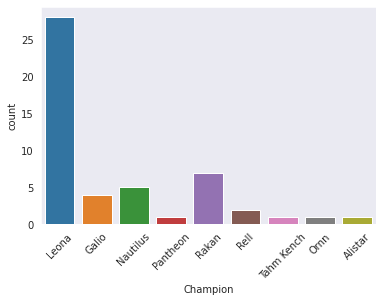

In [5]:
sns.countplot(x=s11['Champion'])
plt.xticks(rotation=45)
plt.show()

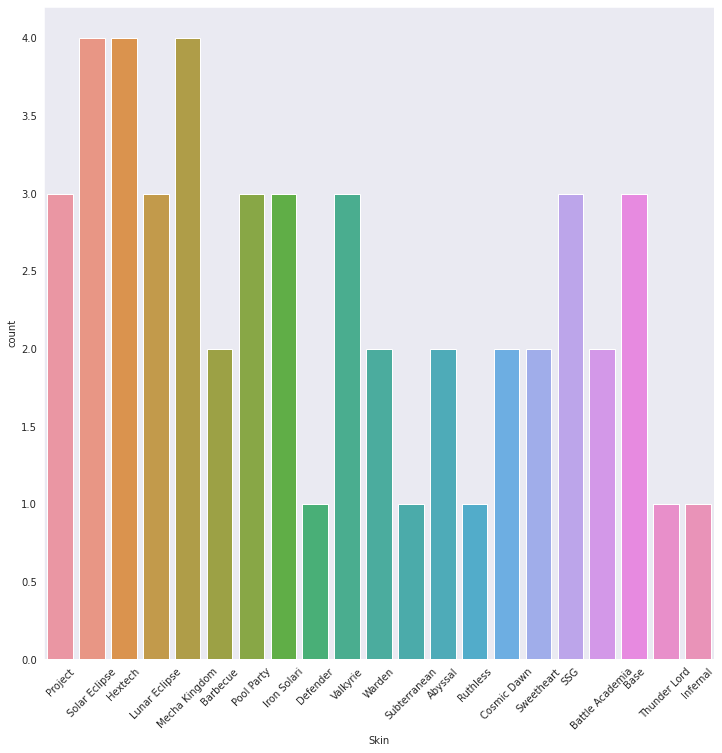

In [6]:
plt.figure(figsize=(12,12))
sns.countplot(x=s11['Skin'])
plt.xticks(rotation = 45)
plt.show()

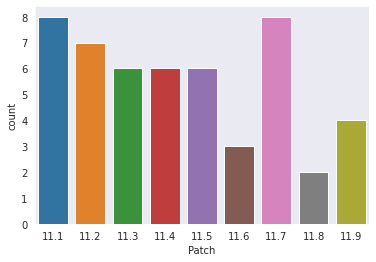

In [7]:
sns.countplot(x=s11['Patch'])
plt.show()

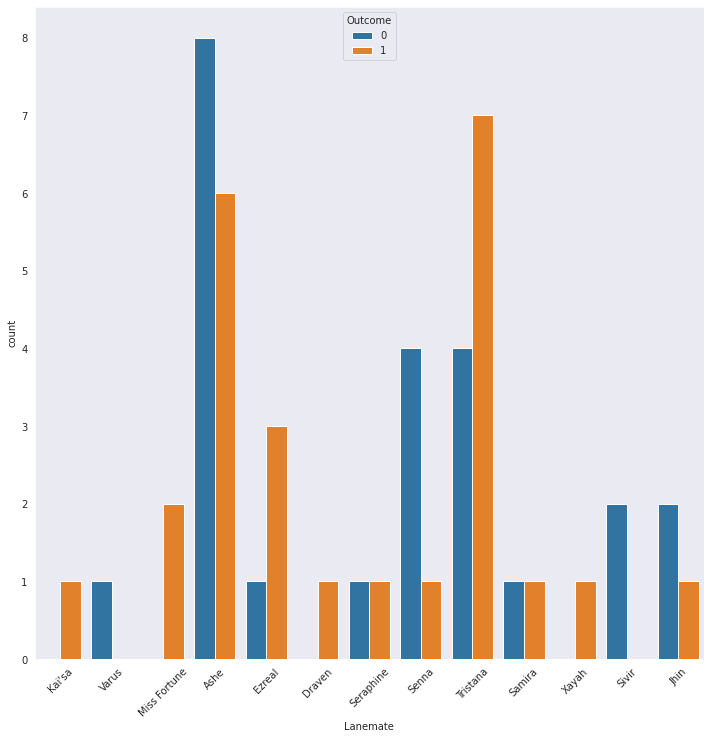

In [8]:
plt.figure(figsize=(12,12))
sns.countplot(x=s11['Lanemate'], hue=s11['Outcome'])
plt.xticks(rotation = 45)
plt.show()

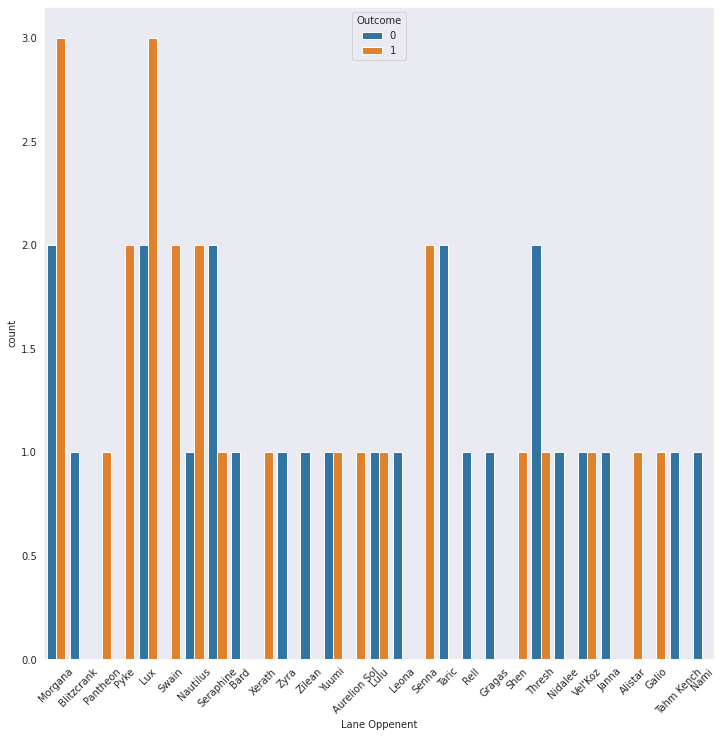

In [9]:
plt.figure(figsize=(12,12))
sns.countplot(x=s11['Lane Oppenent'], hue=s11['Outcome'])
plt.xticks(rotation=45)
plt.show()

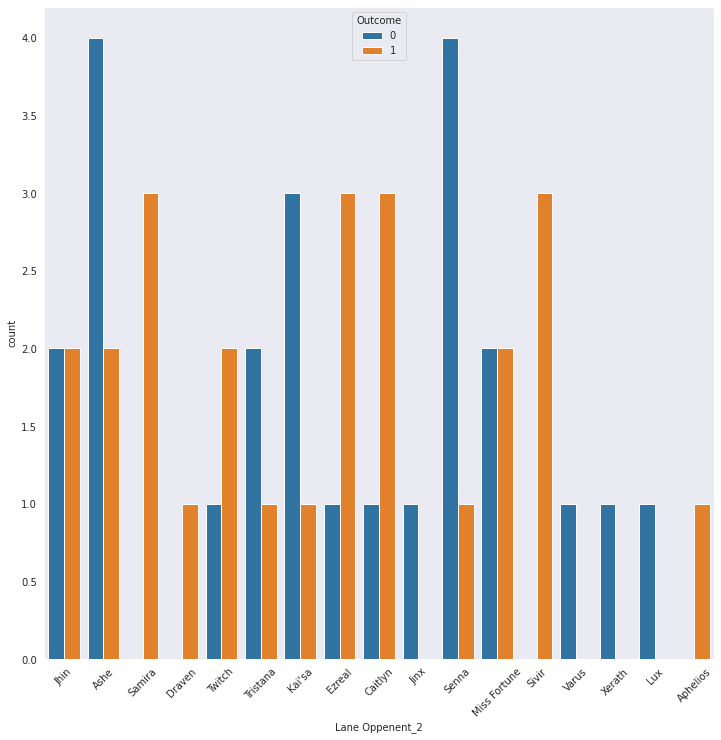

In [10]:
plt.figure(figsize=(12,12))
sns.countplot(x=s11['Lane Oppenent_2'], hue=s11['Outcome'])
plt.xticks(rotation=45)
plt.show()

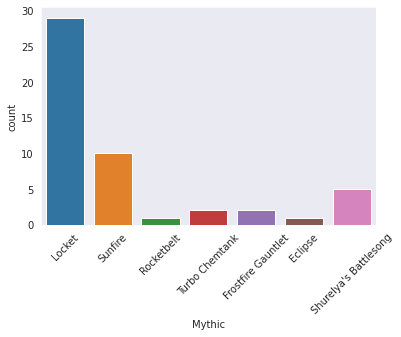

In [11]:
sns.countplot(x=s11['Mythic'])
plt.xticks(rotation=45)
plt.show()

In [12]:
s11.Outcome.replace({0: 'Loss', 1:'Victory'}, inplace=True)

In [13]:
s11 = s11.rename(columns = {'Time (minutes)': 'Time'})

print(s11.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             50 non-null     object 
 1   Patch            50 non-null     float64
 2   Champion         50 non-null     object 
 3   Skin             50 non-null     object 
 4   Role             50 non-null     object 
 5   Lanemate         49 non-null     object 
 6   Kills            50 non-null     int64  
 7   Deaths           50 non-null     float64
 8   Assists          49 non-null     float64
 9   KDA              50 non-null     float64
 10  KP               49 non-null     float64
 11  Total Kills      50 non-null     int64  
 12  Lane Oppenent    50 non-null     object 
 13  Lane Oppenent_2  49 non-null     object 
 14  Mythic           50 non-null     object 
 15  Damage           50 non-null     int64  
 16  Gold             50 non-null     int64  
 17  Time             5

In [14]:
def CountFrequency(df):
  freq = {}
  for item in df:
    if (item in freq):
      freq[item] = freq[item] + 1
    else:
      freq[item] = 1
  for key, value in freq.items():
    print(key, value)
  return freq

champlist = (CountFrequency(s11['Champion']))
labels = []
sizes = []
for x,y in champlist.items():
  labels.append(x)
  sizes.append(y)

Leona 28
Galio 4
Nautilus 5
Pantheon 1
Rakan 7
Rell 2
Tahm Kench 1
Ornn 1
Alistar 1


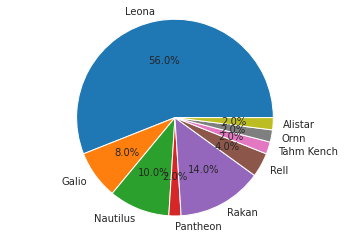

In [15]:
plt.pie(sizes, labels = labels, autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

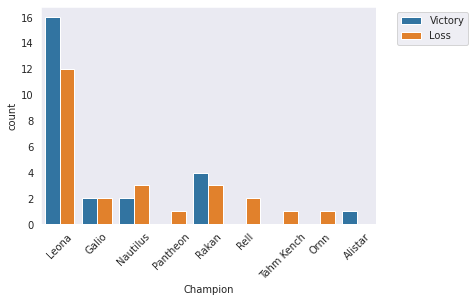

In [17]:
sns.countplot(x= s11['Champion'], hue=s11['Outcome'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

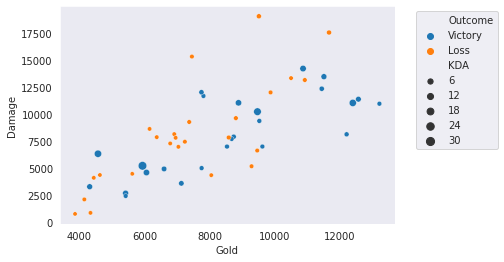

In [18]:
sns.scatterplot(data=s11, x='Gold', y='Damage', hue='Outcome', size=s11['KDA'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

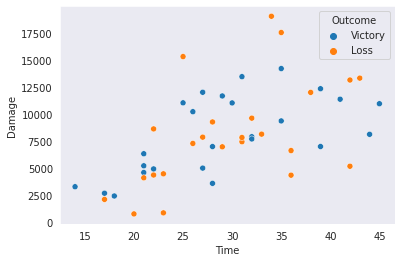

In [19]:
sns.scatterplot(data=s11, x='Time', y='Damage', hue='Outcome')
plt.show()

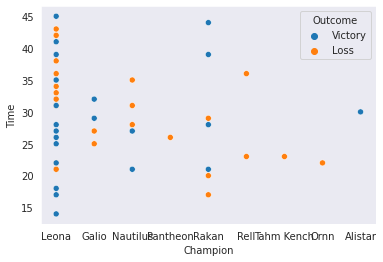

In [20]:
sns.scatterplot(data=s11, x='Champion', y='Time', hue='Outcome')
plt.show()

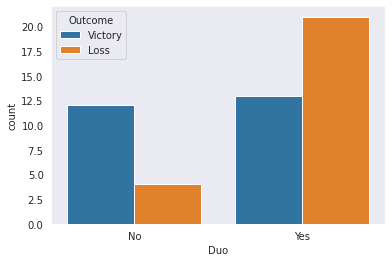

In [21]:
sns.countplot(x=s11['Duo'], hue=s11['Outcome'])
plt.show()

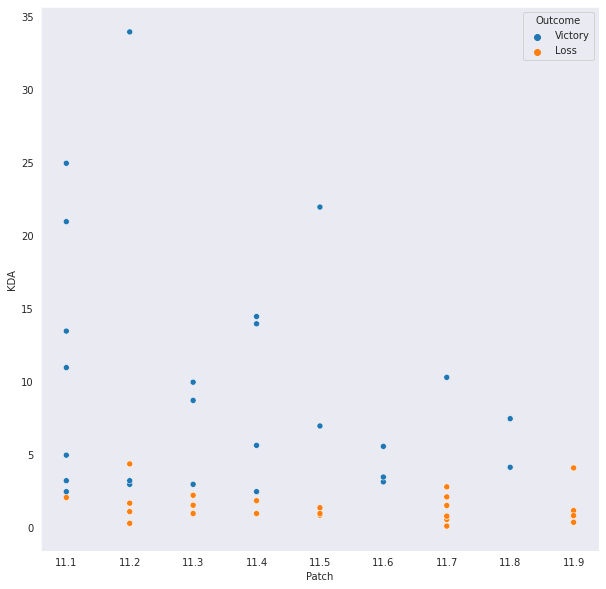

In [22]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=s11['Patch'], y=s11['KDA'], hue=s11['Outcome'])
plt.show()

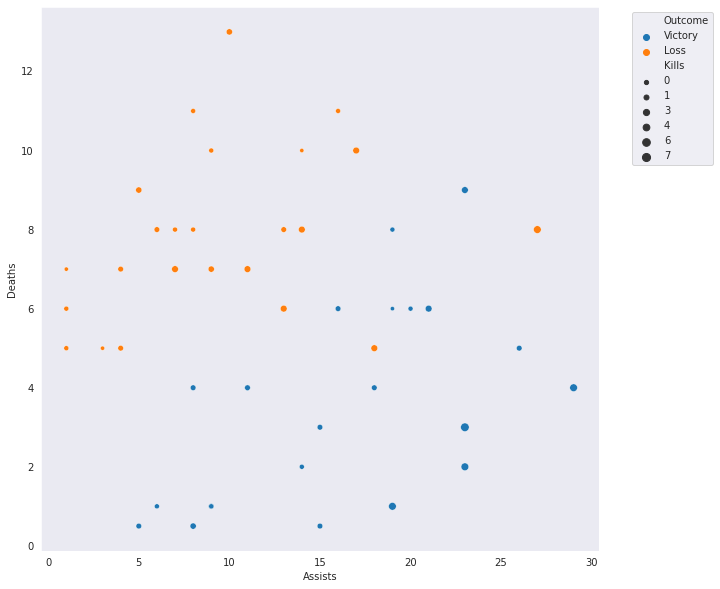

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=s11['Assists'], y=s11['Deaths'], hue=s11['Outcome'], size=s11['Kills'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

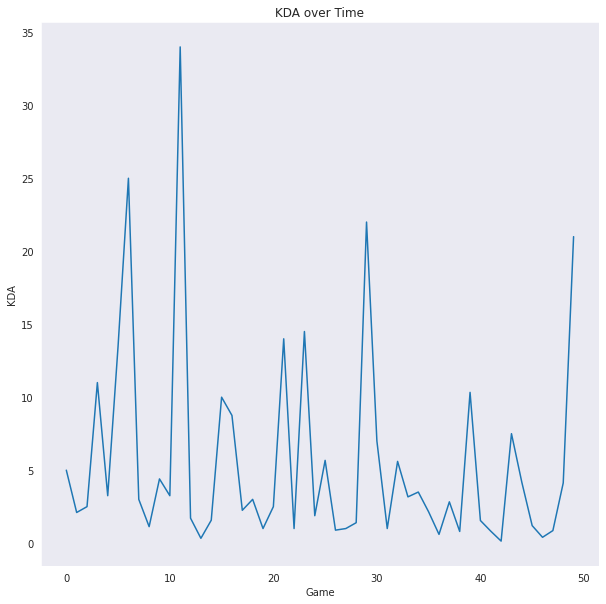

In [24]:
plt.figure(figsize=(10,10))
ax = sns.lineplot(x = s11.index, y = s11['KDA'])
ax.set(xlabel='Game', title='KDA over Time')
plt.show()

<function matplotlib.pyplot.show>

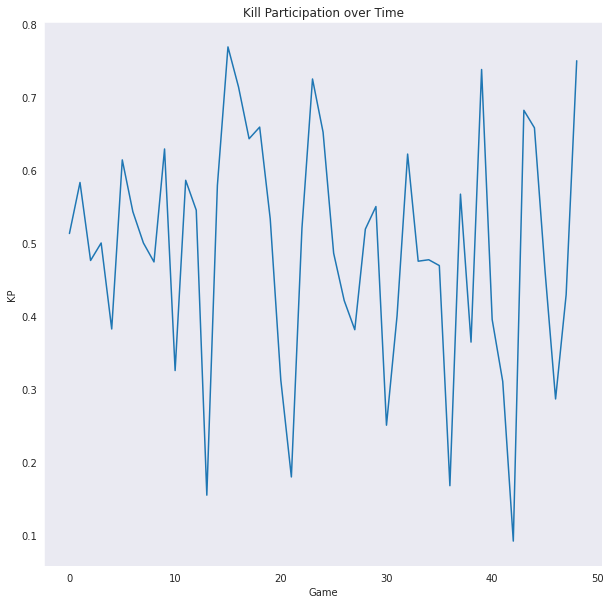

In [25]:
plt.figure(figsize=(10,10))
ax = sns.lineplot(x=s11.index, y = s11['KP'])
ax.set(xlabel='Game', title='Kill Participation over Time')
plt.show

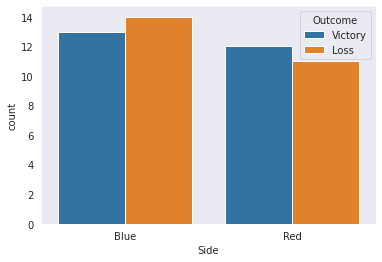

In [26]:
sns.countplot(x=s11['Side'], hue=s11['Outcome'])
plt.show()